In [1]:
import sys
from pathlib import Path
sys.path.insert(0, '/scratch/imb/Xiao/STimage')
from stimage._utils import Read10X, QC_plot
import shutil
import pandas as pd

sample,Visium_folder,count_matrix_h5_file,histology_image

In [2]:
BASE_PATH = Path("/scratch/imb/Xiao/Q1851/Xiao/Q6602")
OUT_PATH = Path("/scratch/imb/Xiao/DATA/DATASET/Blake_visium")
OUT_PATH.mkdir(exist_ok=True, parents=True)

VLP111_A


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


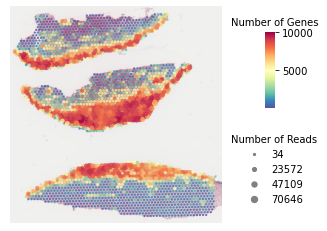

(28122, 28964, 3)
VLP108_A


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


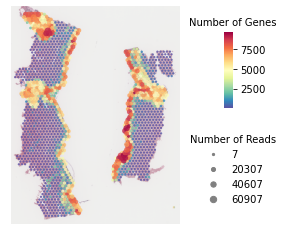

(28317, 21256, 3)
VLP98_A


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


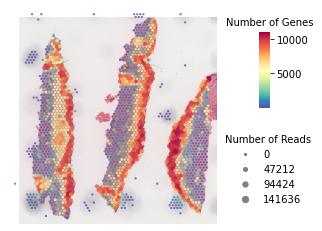

(26798, 25889, 3)
VLP97_A


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


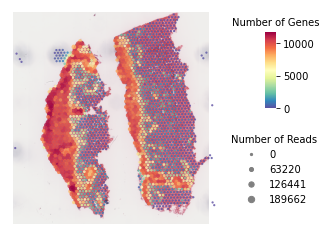

(26832, 24322, 3)
VLP98_D


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


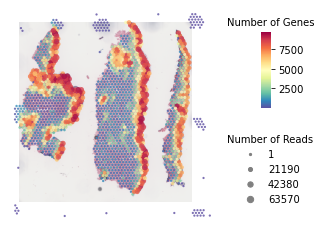

(22926, 22149, 3)
VLP97_D


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


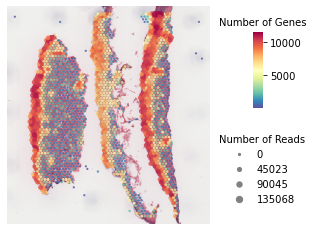

(30705, 29663, 3)
VLP111_D


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


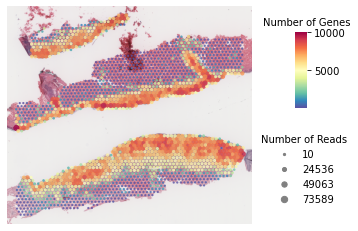

(29138, 32930, 3)
VLP108_D


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


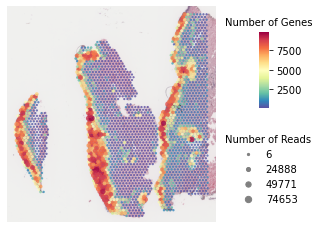

(28070, 32391, 3)


In [5]:
df = pd.DataFrame()
for sample_path in BASE_PATH.glob("./VLP*"):
    sample = sample_path.stem
    print(sample)
    Visium_folder = sample_path / "outs"
    count_matrix_h5_file = "filtered_feature_bc_matrix.h5"
    histology_image = BASE_PATH / "Visium_HE" / f"{sample}1.tif"
    adata = Read10X(path=Visium_folder,
                                count_file=count_matrix_h5_file,
                                library_id=sample,
                                source_image_path=histology_image,
                                quality="fulres")
    QC_plot(adata, image_scale=10)
    print(adata.uns["spatial"][sample]['images']["fulres"].shape)
    df = df.append(pd.Series({"sample": sample, 
                              "Visium_folder": Visium_folder, 
                              "count_matrix_h5_file": count_matrix_h5_file, 
                              "histology_image": histology_image}), ignore_index=True)

In [6]:
df

,sample,Visium_folder,count_matrix_h5_file,histology_image
0,VLP111_A,/scratch/imb/Xiao/Q1851/Xiao/Q6602/VLP111_A/outs,filtered_feature_bc_matrix.h5,/scratch/imb/Xiao/Q1851/Xiao/Q6602/Visium_HE/V...
1,VLP108_A,/scratch/imb/Xiao/Q1851/Xiao/Q6602/VLP108_A/outs,filtered_feature_bc_matrix.h5,/scratch/imb/Xiao/Q1851/Xiao/Q6602/Visium_HE/V...
2,VLP98_A,/scratch/imb/Xiao/Q1851/Xiao/Q6602/VLP98_A/outs,filtered_feature_bc_matrix.h5,/scratch/imb/Xiao/Q1851/Xiao/Q6602/Visium_HE/V...
3,VLP97_A,/scratch/imb/Xiao/Q1851/Xiao/Q6602/VLP97_A/outs,filtered_feature_bc_matrix.h5,/scratch/imb/Xiao/Q1851/Xiao/Q6602/Visium_HE/V...
4,VLP98_D,/scratch/imb/Xiao/Q1851/Xiao/Q6602/VLP98_D/outs,filtered_feature_bc_matrix.h5,/scratch/imb/Xiao/Q1851/Xiao/Q6602/Visium_HE/V...
5,VLP97_D,/scratch/imb/Xiao/Q1851/Xiao/Q6602/VLP97_D/outs,filtered_feature_bc_matrix.h5,/scratch/imb/Xiao/Q1851/Xiao/Q6602/Visium_HE/V...
6,VLP111_D,/scratch/imb/Xiao/Q1851/Xiao/Q6602/VLP111_D/outs,filtered_feature_bc_matrix.h5,/scratch/imb/Xiao/Q1851/Xiao/Q6602/Visium_HE/V...
7,VLP108_D,/scratch/imb/Xiao/Q1851/Xiao/Q6602/VLP108_D/outs,filtered_feature_bc_matrix.h5,/scratch/imb/Xiao/Q1851/Xiao/Q6602/Visium_HE/V...


In [7]:
df.to_csv(OUT_PATH / "dataset_8blake_skin.csv")

In [4]:
# import shutil
# df = pd.DataFrame()
# for sample_path in BASE_PATH.glob("./VLP*"):
#     sample = sample_path.stem
#     print(sample)
#     tissue_pos = sample_path / "outs/spatial/tissue_positions.csv"
#     to_path = sample_path / "outs/spatial/tissue_positions_list.csv"
#     shutil.copy(tissue_pos, to_path)

VLP111_A
VLP108_A
VLP98_A
VLP97_A
VLP98_D
VLP97_D
VLP111_D
VLP108_D
